***#REGRESSION ML PROJECT : LINKEDIN PREDICTION***
Archana Ramachandran
Capstone - Supervised Learning.

In [ ]:
#REGRESSION ML PROJECT : LINKEDIN PREDICTION

# Import Libraries
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import missingno as msno
import plotly as py
from sklearn import datasets
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#KNOW YOUR DATA
#Data Set up
import pandas as pd
import math
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import drive
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/Colab Notebooks/final_data.csv"
Linkedin_df = pd.read_csv(path)
Linkedin_df.info()
print()
Linkedin_df.head(10)





Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Company_Name        811 non-null    object
 1   Class               811 non-null    object
 2   Designation         811 non-null    object
 3   Location            811 non-null    object
 4   Total_applicants    811 non-null    int64 
 5   LinkedIn_Followers  811 non-null    int64 
 6   Level               811 non-null    object
 7   Involvement         811 non-null    object
 8   Employee_count      811 non-null    int64 
 9   Industry            811 non-null    object
 10  PYTHON              811 non-null    int64 
 11  C++                 811 non-null    int64 
 12  JAVA                811 non-null    int64 
 13  HADOOP              811 non-null    int64 
 14  SCALA               811 non-null    int64 
 15  FLASK               811 non-null    int64 
 16 

,Company_Name,Class,Designation,Location,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
0,Wipro,Class 3,Project Manager,Maharashtra,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
1,Wipro,Class 3,Project Manager,Delhi,121,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
2,Wipro,Class 3,Project Manager,Delhi,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
3,Wipro,Class 3,Administrator,Telangana,0,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
4,Wipro,Class 3,Project Manager,Maharashtra,119,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
5,Wipro,Class 3,Administrator,Telangana,39,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
6,Wipro,Class 3,Administrator,Telangana,22,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
7,Wipro,Class 3,Test Engineer,Maharashtra,158,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
8,Wipro,Class 3,Administrator,Maharashtra,11,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
9,Wipro,Class 3,Administrator,Maharashtra,47,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0


In [ ]:

# Dataset Rows & Columns count
Linkedin_df.shape

(811, 41)

In [ ]:
# Dataset duplicate or not.
Linkedin_df.duplicated().sum()

0

In [ ]:
Linkedin_df.columns.tolist()

['Company_Name',
 'Class',
 'Designation',
 'Location',
 'Total_applicants',
 'LinkedIn_Followers',
 'Level',
 'Involvement',
 'Employee_count',
 'Industry',
 'PYTHON',
 'C++',
 'JAVA',
 'HADOOP',
 'SCALA',
 'FLASK',
 'PANDAS',
 'SPARK',
 'NUMPY',
 'PHP',
 'SQL',
 'MYSQL',
 'CSS',
 'MONGODB',
 'NLTK',
 'TENSORFLOW',
 'LINUX',
 'RUBY',
 'JAVASCRIPT',
 'DJANGO',
 'REACT',
 'REACTJS',
 'AI',
 'UI',
 'TABLEAU',
 'NODEJS',
 'EXCEL',
 'POWER BI',
 'SELENIUM',
 'HTML',
 'ML']

In [ ]:
# Missing Values/Null Values Count
Linkedin_df.isnull().sum()

Company_Name          0
Class                 0
Designation           0
Location              0
Total_applicants      0
LinkedIn_Followers    0
Level                 0
Involvement           0
Employee_count        0
Industry              0
PYTHON                0
C++                   0
JAVA                  0
HADOOP                0
SCALA                 0
FLASK                 0
PANDAS                0
SPARK                 0
NUMPY                 0
PHP                   0
SQL                   0
MYSQL                 0
CSS                   0
MONGODB               0
NLTK                  0
TENSORFLOW            0
LINUX                 0
RUBY                  0
JAVASCRIPT            0
DJANGO                0
REACT                 0
REACTJS               0
AI                    0
UI                    0
TABLEAU               0
NODEJS                0
EXCEL                 0
POWER BI              0
SELENIUM              0
HTML                  0
ML                    0
dtype: int64

In [ ]:
def check_missing_values(column):
    nan_percentage = Linkedin_df[column].isnull().sum() / Linkedin_df[column].size
    print(f'"{column}" column consists of {nan_percentage:.2%} missing values.')

for column in Linkedin_df.columns:
    check_missing_values(column)

"Company_Name" column consists of 0.00% missing values.
"Class" column consists of 0.00% missing values.
"Designation" column consists of 0.00% missing values.
"Location" column consists of 0.00% missing values.
"Total_applicants" column consists of 0.00% missing values.
"LinkedIn_Followers" column consists of 0.00% missing values.
"Level" column consists of 0.00% missing values.
"Involvement" column consists of 0.00% missing values.
"Employee_count" column consists of 0.00% missing values.
"Industry" column consists of 0.00% missing values.
"PYTHON" column consists of 0.00% missing values.
"C++" column consists of 0.00% missing values.
"JAVA" column consists of 0.00% missing values.
"HADOOP" column consists of 0.00% missing values.
"SCALA" column consists of 0.00% missing values.
"FLASK" column consists of 0.00% missing values.
"PANDAS" column consists of 0.00% missing values.
"SPARK" column consists of 0.00% missing values.
"NUMPY" column consists of 0.00% missing values.
"PHP" colum

In [ ]:
if Linkedin_df.duplicated().any():
    print("The same values Found!")
else:
    print("The same values not found.")

The same values not found.


In [ ]:
# Dataset Columns
Linkedin_df.columns

Index(['Company_Name', 'Class', 'Designation', 'Location', 'Total_applicants',
       'LinkedIn_Followers', 'Level', 'Involvement', 'Employee_count',
       'Industry', 'PYTHON', 'C++', 'JAVA', 'HADOOP', 'SCALA', 'FLASK',
       'PANDAS', 'SPARK', 'NUMPY', 'PHP', 'SQL', 'MYSQL', 'CSS', 'MONGODB',
       'NLTK', 'TENSORFLOW', 'LINUX', 'RUBY', 'JAVASCRIPT', 'DJANGO', 'REACT',
       'REACTJS', 'AI', 'UI', 'TABLEAU', 'NODEJS', 'EXCEL', 'POWER BI',
       'SELENIUM', 'HTML', 'ML'],
      dtype='object')

In [ ]:

# Dataset Describe
Linkedin_df.describe()

,Total_applicants,LinkedIn_Followers,Employee_count,PYTHON,C++,JAVA,HADOOP,SCALA,FLASK,PANDAS,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
count,811.000000,8.110000e+02,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,23.432799,1.401891e+06,5177.552404,0.093711,0.032059,0.205919,0.027127,0.172626,0.022195,0.003699,...,0.012330,0.868064,0.828607,0.018496,0.032059,0.290999,0.018496,0.013564,0.110974,0.182491
std,35.137773,2.688593e+06,4194.169581,0.291607,0.176266,0.404621,0.162554,0.378157,0.147408,0.060745,...,0.110424,0.338630,0.377085,0.134818,0.176266,0.454503,0.134818,0.115741,0.314294,0.386487
min,0.000000,1.124500e+04,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,8.086500e+04,1200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,2.702800e+05,5000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,7.930220e+05,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,196.000000,1.199697e+07,10001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Check Unique Values for each variable.
Linkedin_df.nunique()

Company_Name           11
Class                   4
Designation           392
Location               16
Total_applicants      115
LinkedIn_Followers     11
Level                   2
Involvement             4
Employee_count          4
Industry                4
PYTHON                  2
C++                     2
JAVA                    2
HADOOP                  2
SCALA                   2
FLASK                   2
PANDAS                  2
SPARK                   2
NUMPY                   2
PHP                     2
SQL                     2
MYSQL                   2
CSS                     2
MONGODB                 2
NLTK                    2
TENSORFLOW              2
LINUX                   2
RUBY                    2
JAVASCRIPT              2
DJANGO                  2
REACT                   2
REACTJS                 2
AI                      2
UI                      2
TABLEAU                 2
NODEJS                  2
EXCEL                   2
POWER BI                2
SELENIUM    

***Data Exploration***

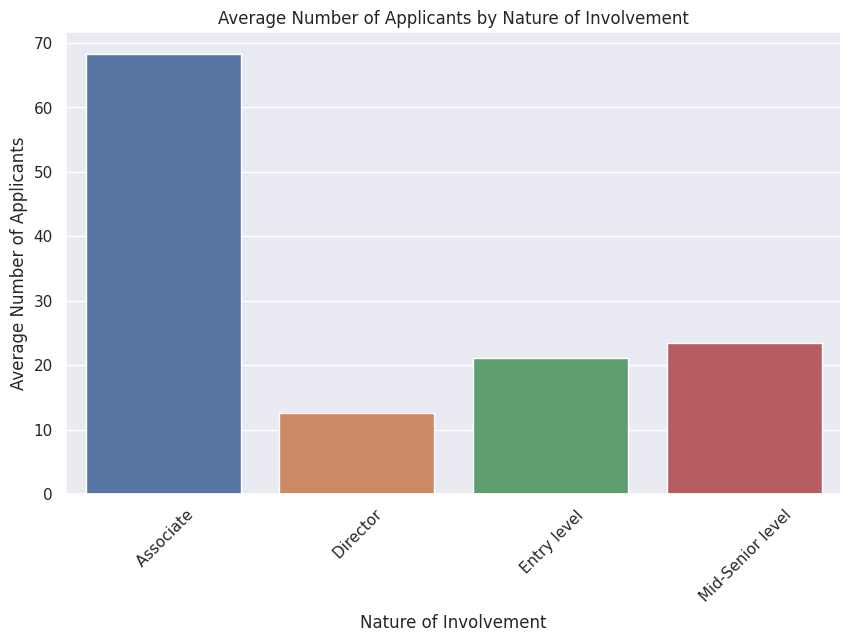

In [ ]:

avg_applicants_per_involvement = Linkedin_df.groupby('Involvement')['Total_applicants'].mean()


plt.figure(figsize=(10, 6))
sns.barplot(x=avg_applicants_per_involvement.index, y=avg_applicants_per_involvement.values)
plt.title('Average Number of Applicants by Nature of Involvement')
plt.xlabel('Nature of Involvement')
plt.ylabel('Average Number of Applicants')
plt.xticks(rotation=45)
plt.show()

In [ ]:
labels = Linkedin_df['Designation'].value_counts()[:15]

pd.DataFrame(labels)

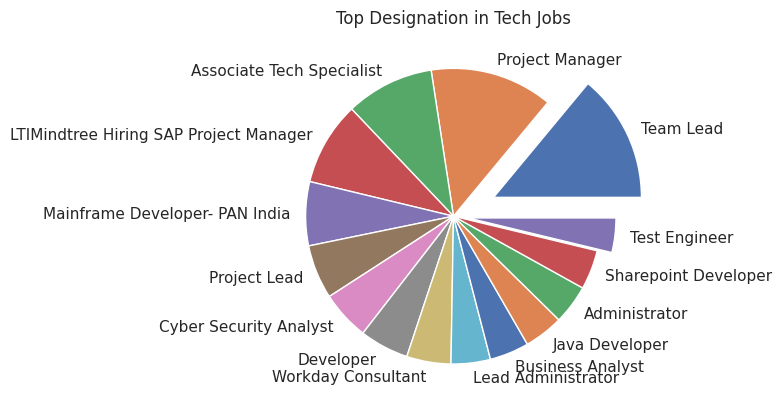

In [ ]:
plt.pie(Linkedin_df['Designation'].value_counts()[:15],
        labels=labels.index,
        explode=[0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1])
plt.title('Top Designation in Tech Jobs')
plt.show()

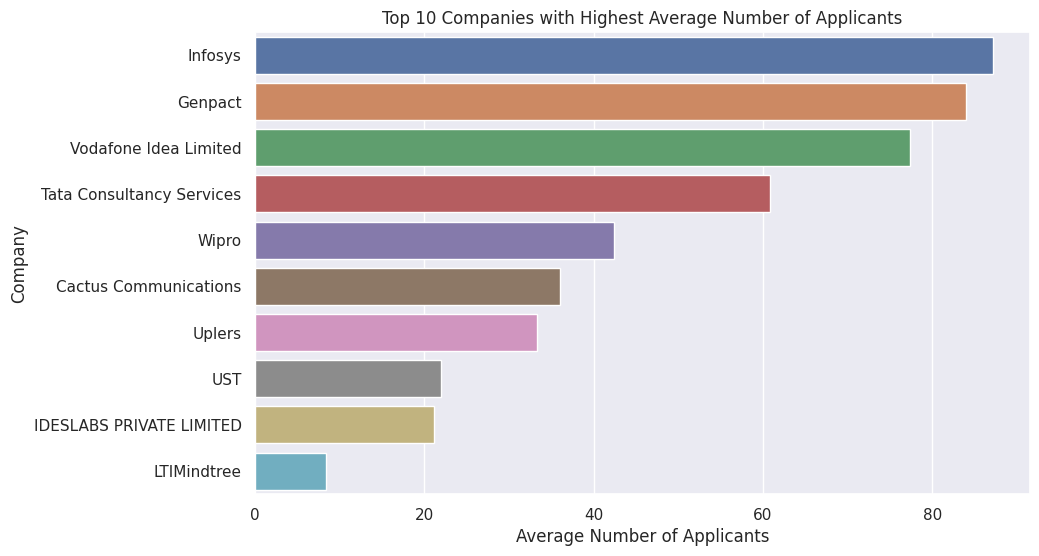

In [ ]:
avg_applicants_per_company = Linkedin_df.groupby('Company_Name')['Total_applicants'].mean()

top_10_companies_applicants = avg_applicants_per_company.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_companies_applicants.values, y=top_10_companies_applicants.index)
plt.title('Top 10 Companies with Highest Average Number of Applicants')
plt.xlabel('Average Number of Applicants')
plt.ylabel('Company')
plt.show()


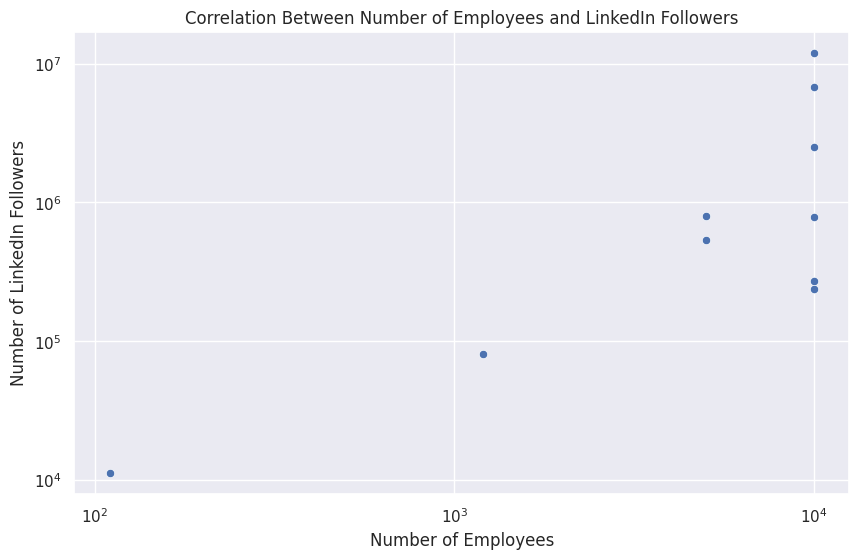

0.5250110957069789

In [ ]:
# Plot the correlation between the number of employees and the number of LinkedIn followers of the companies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Employee_count', y='LinkedIn_Followers', data=Linkedin_df)
plt.title('Correlation Between Number of Employees and LinkedIn Followers')
plt.xlabel('Number of Employees')
plt.ylabel('Number of LinkedIn Followers')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Calculate the correlation coefficient
correlation_employees_followers = Linkedin_df[['Employee_count', 'LinkedIn_Followers']].corr().iloc[0, -1]
correlation_employees_followers

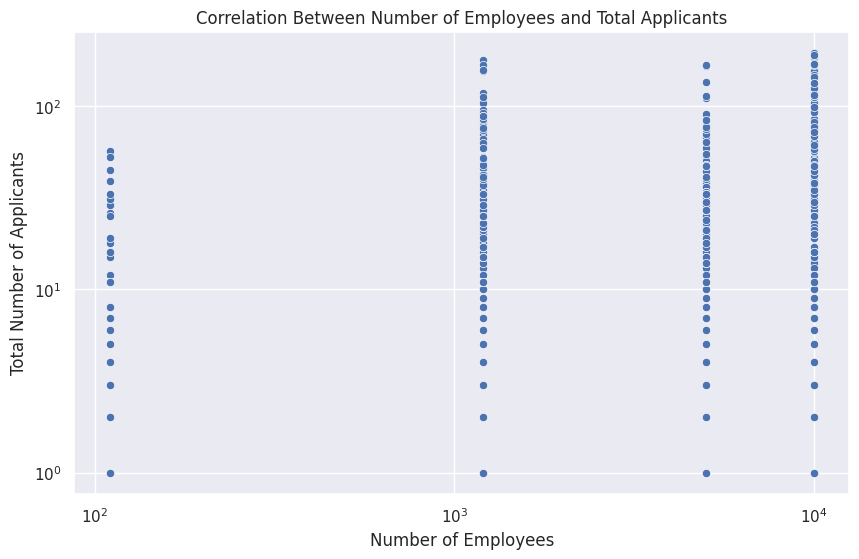

0.12430728030577878

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Employee_count', y='Total_applicants', data=Linkedin_df)
plt.title('Correlation Between Number of Employees and Total Applicants')
plt.xlabel('Number of Employees')
plt.ylabel('Total Number of Applicants')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Calculate the correlation coefficient
correlation_employees_applicants = Linkedin_df[['Employee_count', 'Total_applicants']].corr().iloc[0, 1]
correlation_employees_applicants

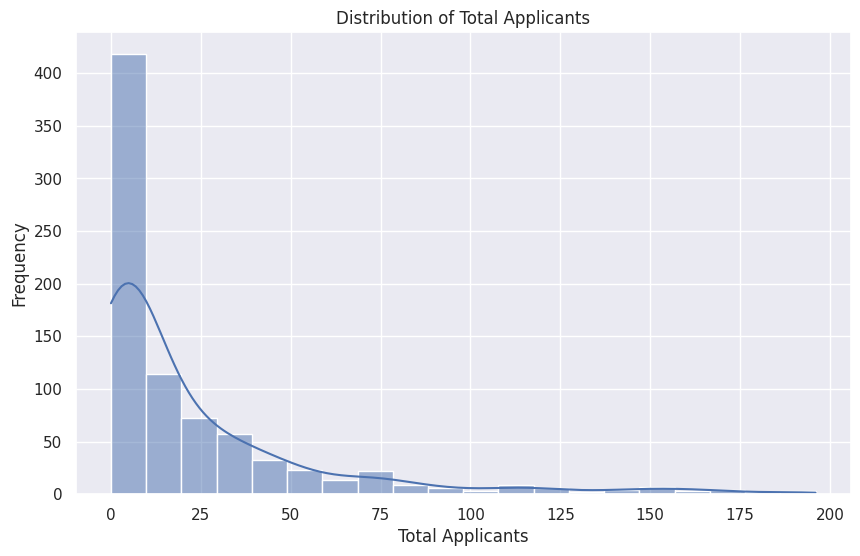

In [ ]:
# Data Visualization
# Example: Visualize the distribution of 'Total_applicants' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=Linkedin_df, x='Total_applicants', bins=20, kde=True)
plt.title('Distribution of Total Applicants')
plt.xlabel('Total Applicants')
plt.ylabel('Frequency')
plt.show()

In [ ]:
col = Linkedin_df[['Total_applicants',
       'LinkedIn_Followers','Employee_count','PYTHON', 'C++', 'JAVA', 'HADOOP', 'SCALA', 'FLASK',
       'PANDAS', 'SPARK', 'NUMPY', 'PHP', 'SQL', 'MYSQL', 'CSS', 'MONGODB',
       'NLTK', 'TENSORFLOW', 'LINUX', 'RUBY', 'JAVASCRIPT', 'DJANGO', 'REACT',
       'REACTJS', 'AI', 'UI', 'TABLEAU', 'NODEJS', 'EXCEL', 'POWER BI',
       'SELENIUM', 'HTML', 'ML']]


In [ ]:
col.corr()

,Total_applicants,LinkedIn_Followers,Employee_count,PYTHON,C++,JAVA,HADOOP,SCALA,FLASK,PANDAS,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
Total_applicants,1.000000,0.345985,0.124307,0.090981,0.135494,0.046953,0.072944,0.082822,0.121610,-0.030249,...,-0.006786,0.107835,0.174346,-0.012377,0.005730,0.037868,-0.051208,0.036197,0.059925,0.060722
LinkedIn_Followers,0.345985,1.000000,0.525011,-0.006773,0.050819,-0.132053,-0.042804,0.275485,-0.002496,-0.025662,...,-0.050748,0.083722,0.083578,-0.032162,0.160676,0.321249,-0.056377,-0.026420,-0.116671,0.023301
Employee_count,0.124307,0.525011,1.000000,0.012093,0.025696,-0.043989,0.004157,0.164924,0.023577,0.070119,...,-0.103203,-0.098795,0.072754,-0.080308,-0.008561,0.321881,-0.086225,-0.077878,-0.030625,0.059382
PYTHON,0.090981,-0.006773,0.012093,1.000000,0.469889,0.328027,0.493245,0.177790,0.468529,0.189492,...,-0.035929,-0.024666,0.078882,0.207080,0.061572,-0.019710,0.050066,-0.037706,0.061506,0.100020
C++,0.135494,0.050819,0.025696,0.469889,1.000000,0.201595,0.659008,0.176170,-0.027419,-0.011089,...,-0.020335,0.050267,0.082770,0.130871,-0.033121,-0.039542,-0.024983,0.099688,-0.064299,0.004626
JAVA,0.046953,-0.132053,-0.043989,0.328027,0.201595,1.000000,0.252831,-0.063165,0.192364,-0.031029,...,0.053627,-0.026731,0.005038,-0.002009,0.045804,-0.071138,-0.024641,0.124821,0.421982,0.335712
HADOOP,0.072944,-0.042804,0.004157,0.493245,0.659008,0.252831,1.000000,0.245067,-0.025158,-0.010175,...,-0.018658,0.020243,0.035663,0.146079,-0.030390,-0.006717,-0.022922,-0.019581,-0.058997,-0.019942
SCALA,0.082822,0.275485,0.164924,0.177790,0.176170,-0.063165,0.245067,1.000000,-0.002376,0.133399,...,-0.051037,0.120232,0.129823,0.009943,0.027999,0.231725,-0.062704,0.002852,-0.130220,-0.021529
FLASK,0.121610,-0.002496,0.023577,0.468529,-0.027419,0.192364,-0.025158,-0.002376,1.000000,-0.009180,...,-0.016834,0.058736,0.068521,-0.020682,-0.027419,-0.059667,-0.020682,-0.017667,0.293190,0.232198
PANDAS,-0.030249,-0.025662,0.070119,0.189492,-0.011089,-0.031029,-0.010175,0.133399,-0.009180,1.000000,...,-0.006808,-0.156297,0.027713,-0.008365,-0.011089,-0.039037,-0.008365,-0.007145,-0.021528,-0.028789


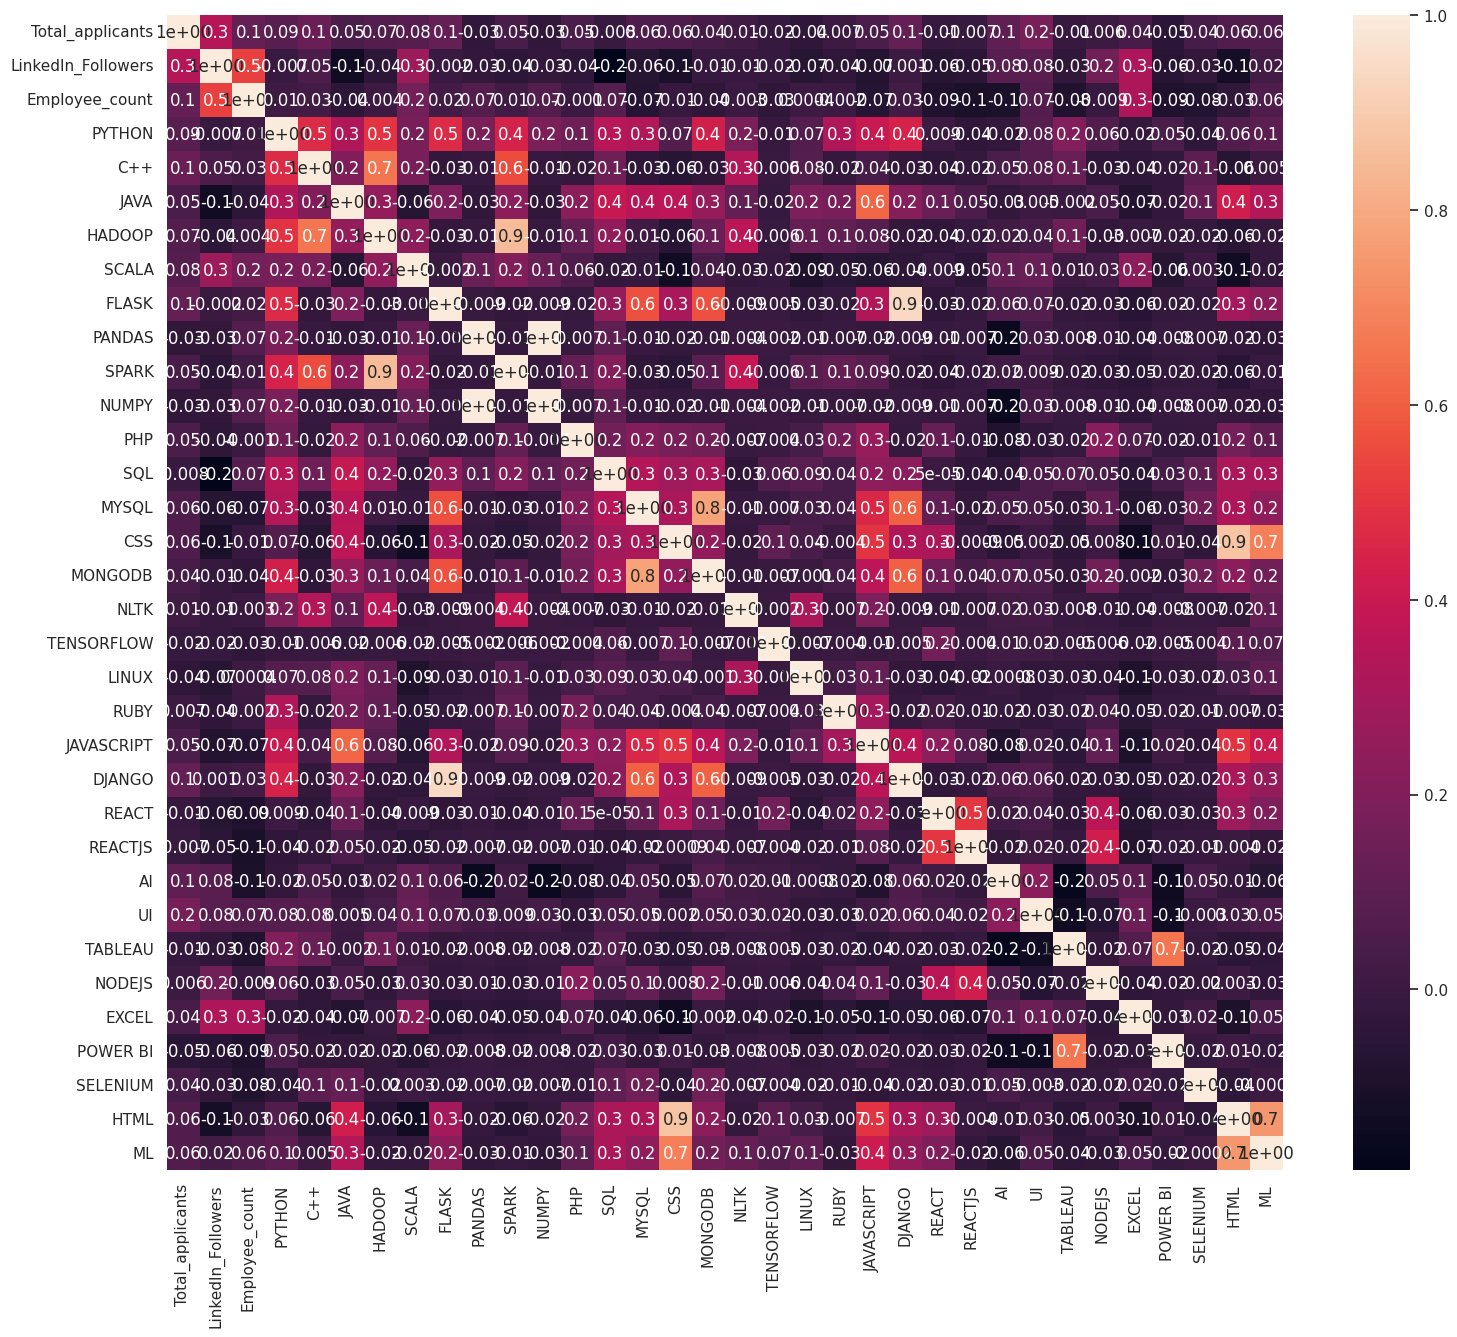

In [ ]:
plt.figure(figsize=(18,15))
sns.heatmap(col.corr(),annot=True,fmt='1.1')
plt.show()

In [ ]:

Linkedin_df.columns

Index(['Company_Name', 'Class', 'Designation', 'Location', 'Total_applicants',
       'LinkedIn_Followers', 'Level', 'Involvement', 'Employee_count',
       'Industry', 'PYTHON', 'C++', 'JAVA', 'HADOOP', 'SCALA', 'FLASK',
       'PANDAS', 'SPARK', 'NUMPY', 'PHP', 'SQL', 'MYSQL', 'CSS', 'MONGODB',
       'NLTK', 'TENSORFLOW', 'LINUX', 'RUBY', 'JAVASCRIPT', 'DJANGO', 'REACT',
       'REACTJS', 'AI', 'UI', 'TABLEAU', 'NODEJS', 'EXCEL', 'POWER BI',
       'SELENIUM', 'HTML', 'ML'],
      dtype='object')

In [ ]:
# Perform one-hot encoding for categorical columns
import pandas as pd

categorical_columns = ['Company_Name', 'Class', 'Designation', 'Location', 'Level', 'Involvement', 'Industry']
df_encoded = pd.get_dummies(Linkedin_df, columns=categorical_columns, drop_first=True)
X = df_encoded.drop('Total_applicants', axis=1)  # Features excluding the target variable
y = df_encoded['Total_applicants']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 3554.151475743208
R-squared (R2) Score: -1.5903649148449297


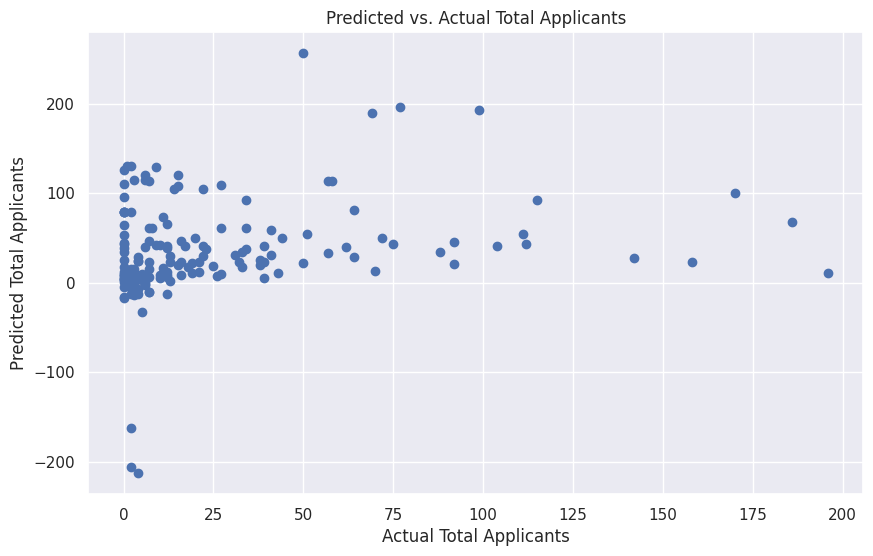

In [ ]:
# Visualize Predictions vs. Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Total Applicants')
plt.ylabel('Predicted Total Applicants')
plt.title('Predicted vs. Actual Total Applicants')
plt.show()

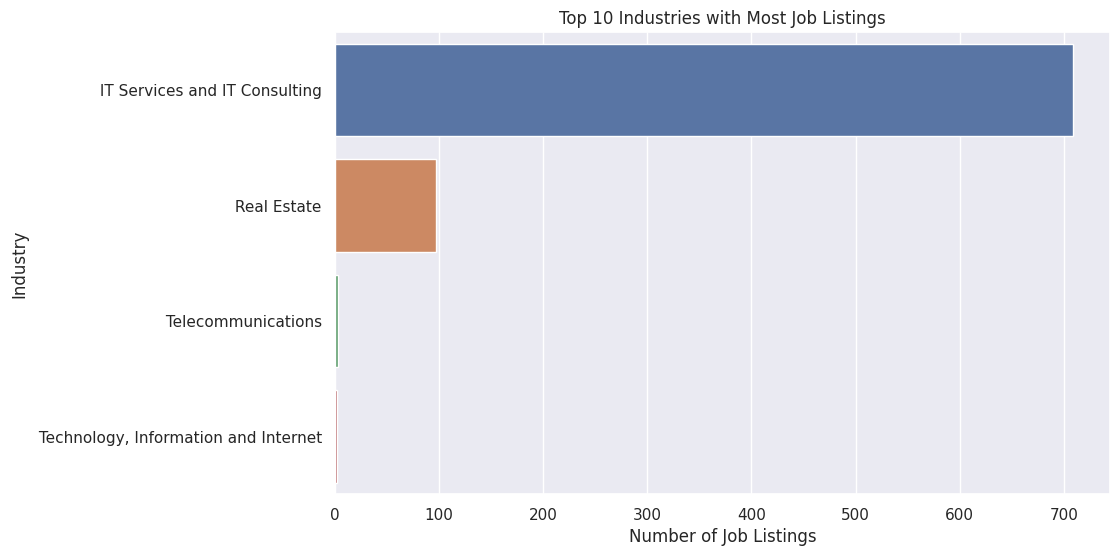

In [ ]:
# Plot the top 10 industries with the most job listings
plt.figure(figsize=(10, 6))
sns.countplot(y='Industry', data=Linkedin_df, order=Linkedin_df['Industry'].value_counts().index[:10])
plt.title('Top 10 Industries with Most Job Listings')
plt.xlabel('Number of Job Listings')
plt.ylabel('Industry')
plt.show()

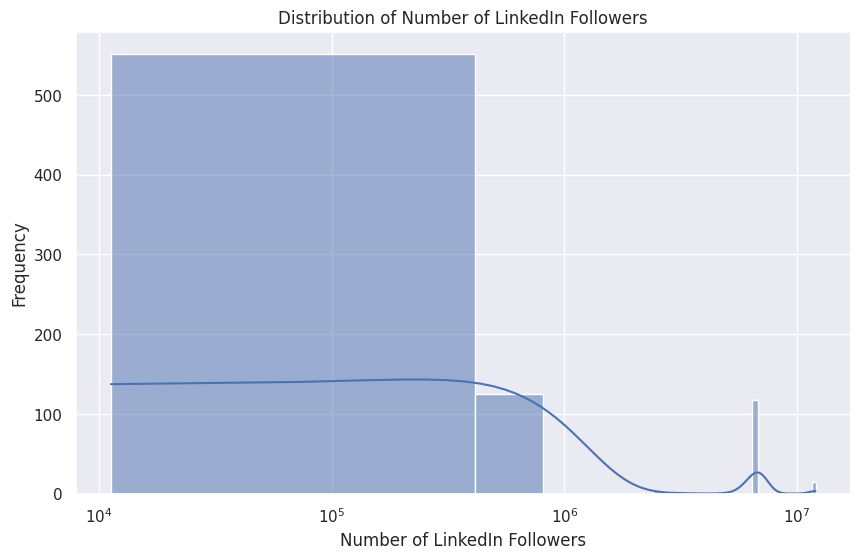

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(Linkedin_df['LinkedIn_Followers'], kde=True, bins=30)
plt.title('Distribution of Number of LinkedIn Followers')
plt.xlabel('Number of LinkedIn Followers')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

<Axes: >

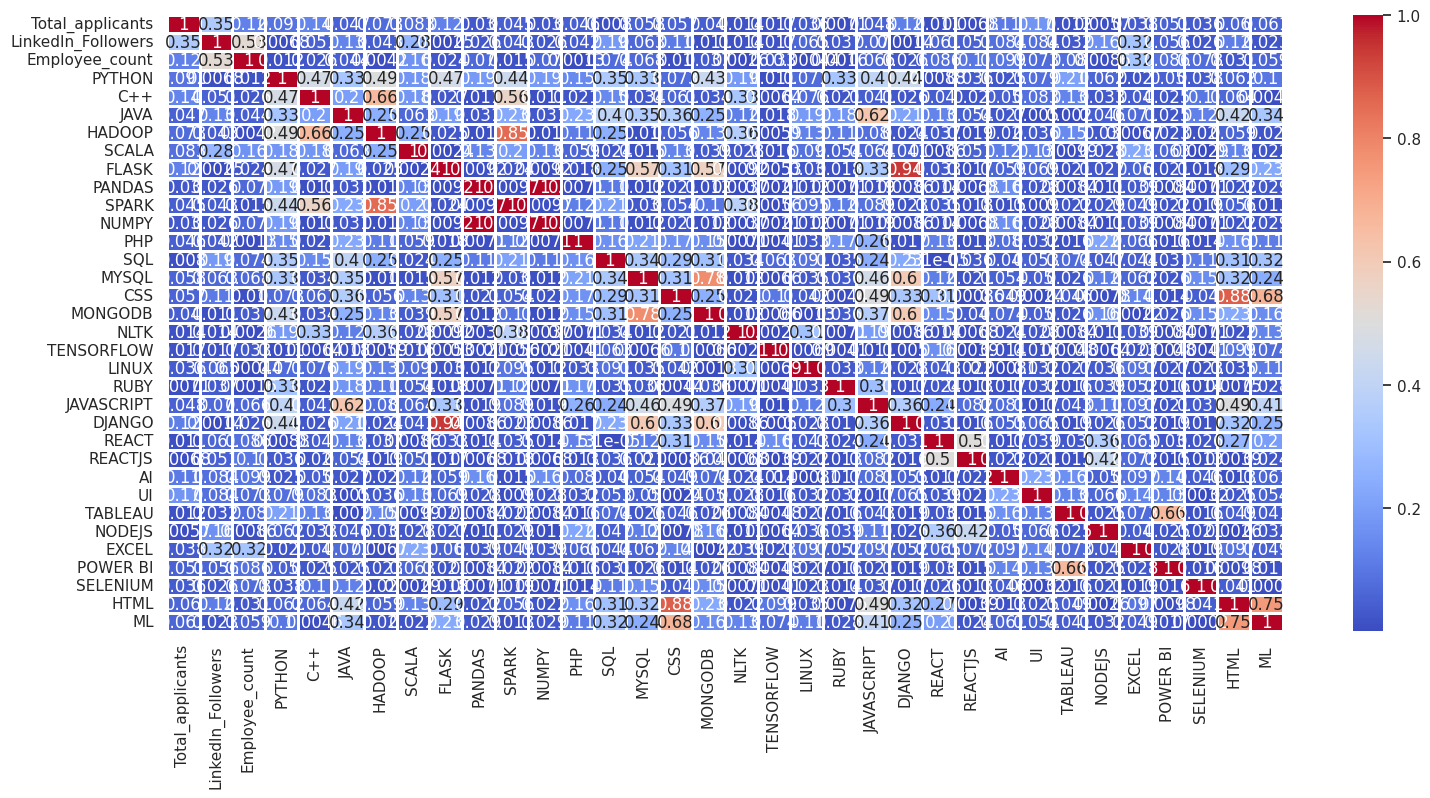

In [ ]:

#Correlation Matrics
plt.figure(figsize=(18,8))
correlation = Linkedin_df.corr()
sns.heatmap(abs(correlation), annot=True,cmap="coolwarm", linewidths=2.0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Training
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")
print(X_train.shape)
print(X_test.shape)

Mean Absolute Error: 13.890269889960074
Mean Squared Error: 742.307913358239
R-squared (R2) Score: 0.07532332117981566
(648, 459)
(163, 459)


In [ ]:
from sklearn.linear_model import LinearRegression
#Fitting the model
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
reg.coef_

#Intercept value
reg.intercept_
#Predicting for train set
Y_pred_train = reg.predict(X_train)
Y_pred_train
#Predicting for test set
Y_pred_test = reg.predict(X_test)
Y_pred_test
#Train data
MSE  = mean_squared_error(y_train, Y_pred_train)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)



r2 = r2_score(y_train, Y_pred_train)
print("R2 :" ,r2)

# actual vs predicted target data
regression_Dataframe = pd.DataFrame(zip(y_test, Y_pred_test), columns = ['actual', 'pred'])
regression_Dataframe

MSE : 328.19369326202377
RMSE : 18.116116947680144
R2 : 0.7536891273108952


,actual,pred
0,0,-16.168305
1,1,2.772309
2,0,36.099319
3,8,34.421625
4,34,49.644634
...,...,...
158,12,79.602111
159,50,15.687132
160,16,47.076687
161,1,1.396366


In [ ]:
#import lasso regressor
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# train data with lasso regression
#('scaler', StandardScaler()),
lasso = Lasso()
lasso_model = Pipeline([('lasso', lasso)])
parameters = {'lasso__alpha':[0.001, 0.01, 0.1, 1, 10]}
# GridSearchCV is used for hyperparameter tuning because Lasso() have only one hyperparameter
# cv=3 since dataset is large
lasso_reg_model = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_reg_model.fit(X_train, y_train)
# Print best hyperparameters and corresponding mean cross-validation score
print("Best hyperparameters: ", lasso_reg_model.best_params_)
Y_pred_l1_train = lasso_reg_model.predict(X_train)


Y_pred_l1_test = lasso_reg_model.predict(X_test)



#Evaluation
#Train data
MSE  = mean_squared_error(y_train, Y_pred_l1_train)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)



r2 = r2_score(y_train, Y_pred_l1_train)
print("R2 :" ,r2)

# actual vs predicted target data
lasso_Dataframe = pd.DataFrame(zip(y_test, Y_pred_l1_test), columns = ['actual', 'pred'])
lasso_Dataframe

Best hyperparameters:  {'lasso__alpha': 0.1}
MSE : 662.4862435559768
RMSE : 25.73880812228835
R2 : 0.5028010344351088


,actual,pred
0,0,-1.719661
1,1,15.251568
2,0,35.188802
3,8,17.768252
4,34,53.710424
...,...,...
158,12,41.201353
159,50,34.525567
160,16,24.400154
161,1,17.533276


In [ ]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor


# Create decision tree regressor
dt = DecisionTreeRegressor()


# Define hyperparameters to tune
params = {'max_depth': [5, 7, 9, 10]}


# Use Grid Search to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid=params, cv=3, scoring= 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 7, 9, 10]},
             scoring='neg_mean_squared_error')
# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
# Train the decision tree with the best hyperparameters
dt = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'])
dt.fit(X_train, y_train)

#Train data
Y_pred_dt_train = dt.predict(X_train)


# Predict the response for the test dataset
Y_pred_dt_test = dt.predict(X_test)
#train data
MSE  = mean_squared_error(y_train, Y_pred_dt_train)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_train, Y_pred_dt_train)
print("R2 :" ,r2)
#test data
MSE  = mean_squared_error(y_test, Y_pred_dt_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


r2 = r2_score(y_test, Y_pred_dt_test)
print("R2 :" ,r2)

# actual vs predicted target data
DT_Dataframe = pd.DataFrame(zip(y_test, Y_pred_dt_test), columns = ['actual', 'pred'])
DT_Dataframe

Best hyperparameters: {'max_depth': 5}
MSE : 845.8366191717084
RMSE : 29.08327043459364
R2 : 0.365195736243927
MSE : 746.0786280306074
RMSE : 27.314439917937314
R2 : 0.07062622465520751


,actual,pred
0,0,13.965517
1,1,13.965517
2,0,39.934343
3,8,13.965517
4,34,39.934343
...,...,...
158,12,39.934343
159,50,39.934343
160,16,13.965517
161,1,13.965517


In [ ]:
#import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor


# Create random forest regressor
rf = RandomForestRegressor()


# Train the random forest with the best hyperparameters
#rf = RandomForestRegressor(n_estimators = 500,
                           # max_depth = 7)
rf.fit(X_train, y_train)


#predicting train data
Y_pred_train_RF = rf.predict(X_train)


#predicting test data
Y_pred_test_RF = rf.predict(X_test)
#train
MSE  = mean_squared_error(y_train, Y_pred_train_RF)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


r2 = r2_score(y_train, Y_pred_train_RF)
print("R2 :" ,r2)


#test
MSE  = mean_squared_error(y_test, Y_pred_test_RF)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


r2 = r2_score(y_test, Y_pred_test_RF)
print("R2 :" ,r2)

# actual vs predicted target data
RF_Dataframe = pd.DataFrame(zip(y_test, Y_pred_test_RF), columns = ['actual', 'pred'])
RF_Dataframe

MSE : 186.0355795238282
RMSE : 13.639486043243279
R2 : 0.860379443954904
MSE : 761.3157840555268
RMSE : 27.591951436162084
R2 : 0.05164563375183684


,actual,pred
0,0,3.240000
1,1,2.786667
2,0,15.608857
3,8,37.212755
4,34,117.898988
...,...,...
158,12,12.041000
159,50,19.669833
160,16,25.341444
161,1,7.287333


In [ ]:
4
R2 : 0.7536891273108952

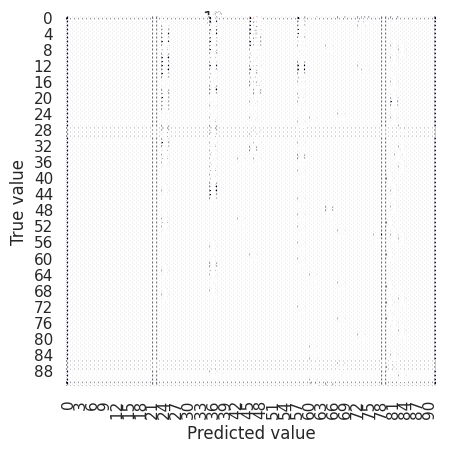

In [ ]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model = GaussianNB()
model.fit(X_train,y_train)
y_model = model.predict(X_test)
accuracy_score(y_test,y_model)
mat = confusion_matrix(y_test,y_model)
sns.heatmap(mat,square=True,annot=True,cbar = False)
plt.xlabel("Predicted value")
plt.ylabel("True value");


In [ ]:

#Making a comparison table
all_models = [{'Model': 'LinearRegression','R2': 0.868211},
               {'Model': 'RandomForestRegressor','R2': 0.868211},
               {'Model': 'DecisionTreeRegressor','R2': 0.868211},
               {'Model': 'DecisionTreeRegressor','R2 Train': 0.93519}]

# function to create comparison table
def create_comparison_table(all_models):
    comparison_table = pd.DataFrame(all_models)
    return comparison_table

# create comparison table
comparison_table = create_comparison_table(all_models)
comparison_table

,Model,R2 Train
0,LinearRegression,0.868211
1,RandomForestRegressor,0.868211
2,DecisionTreeRegressor,0.868211
3,DecisionTreeRegressor,0.935190


Conclusion
We used 4 different regression models to predict the sales of LINKEDIN .
3 different evaluation metrics were used to evaluate the models.
We used R2
Comparing these models it is evident that Linear Regression  is the best model